<a href="https://colab.research.google.com/github/nanangyudi/2020pds_d/blob/main/TugasAkhir_205150409111028_BAGUSTAUFIKWICAKSONO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Deskripsi tujuan bisnis**
- untuk mengetahui perbandingan film yang ada didunia

**2. Analisa pendekatan**
- pada analisa data ini kami menggunakan Exploratory Data Analysis (EDA)
- memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya

**3. Pengumpulan data**
- saya mendapatkan dan menggunakan data dari website kaggle.com dengan besar data yang saya download adalah 600 KB

**4. Pemahaman terhadap data yang dikumpulkan** 
- data yang didapatkan menunjukkan informasi tentang daftar platform film diseluruh dunia
- data terdiri dari 
1. id
2. tittle
3. year
4. IMDb
5. Rotten Tomatoes
6. Netflix
7. Hulu
8. Prime Video
9. Disney+
10. Type
11. Directors
12. Genre
13. Country
14. Language
15. Runtime

**5. Eksplorasi Data**
- Library yang digunakan dalam explorasi data adalah pandas, Matpolib, dan Seaborn

**TAHAP EKSPLORASI DATA**

In [ ]:
import pandas as pd
import os 
os.listdir ('sample_data')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import numpy as np
import re # import library for regular expression
import random # library for random number generation

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/taufikbaguss/bloounded/master/movies.csv')
print("read dataset in dataframe!")

read dataset in dataframe!


Menampilkan 15 kolom data file

In [ ]:
df.head(15)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


Mendeskripsikan data file

In [ ]:
df.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


Menampilkan dimensi data

In [ ]:
dimensi = df.shape
print(f'Dimensi data sejumlah {dimensi[0]} data, dan terdiri dari {dimensi[1]} kolom')

Dimensi data sejumlah 16744 data, dan terdiri dari 17 kolom


Menampilkan jumlah pengguna Netflix dan Disney+

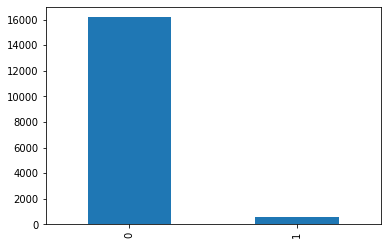

In [ ]:
df['Netflix'].value_counts() 
df['Disney+'].value_counts().plot(kind='bar')

Menampilkan Total dari IMDb

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


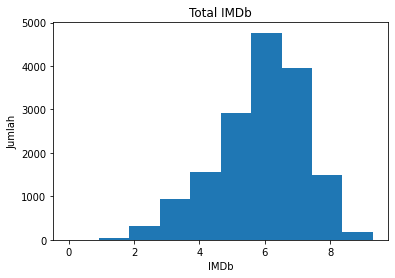

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(df['IMDb'],bins = 10)
#Labels and Title
plt.title('Total IMDb')
plt.xlabel('IMDb')
plt.ylabel('Jumlah')
plt.show()

Menjelaskan Genres film dari masing masing judul film

In [ ]:
data= df.groupby(['Title','Genres'])
data.size()

Title                        Genres                          
#IMomSoHard Live             Comedy                              1
#LoveSwag                    Short,Comedy,Drama,Romance          1
#Rucker50                    Documentary                         1
#Selfie                      Comedy                              1
#SquadGoals                  Drama,Thriller                      1
                                                                ..
Æon Flux                     Action,Adventure,Sci-Fi,Thriller    1
Çok Filim Hareketler Bunlar  Comedy                              1
Öldür Beni Sevgilim          Comedy,Romance                      1
İncir Reçeli 2               Drama,Romance                       1
​Maj Rati ​​Keteki           Drama                               1
Length: 16469, dtype: int64

Import library yang akan digunakan

In [ ]:
#import the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [ ]:
#import the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

%matplotlib inline
pd.set_option('display.max_rows', 500)

**PEMODELAN DATA**

Memasukkan model yang akan diterapkan

In [ ]:

#function to investigate the data

def data_inv(df):
    print('No of Rows: ', df.shape[0])
    print('No of Coloums: ', df.shape[1])
    print('**'*25)
    print('Colums Names: \n', df.columns)
    print('**'*25)
    print('Datatype of Columns: \n', df.dtypes)
    print('**'*25)
    print('Missing Values: ')
    c = df.isnull().sum()
    c = c[c>0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise:\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation:')
    plt.figure(figsize=(8,6))
    sns.heatmap(df.isnull(), yticklabels=False,cbar=False)
    plt.show()  

Menampilkan data dari perbandingan platform film

In [ ]:
df.head(15)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


Menampilkan data yang tidak memiliki baris dan kolom

No of Rows:  16744
No of Coloums:  17
**************************************************
Colums Names: 
 Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')
**************************************************
Datatype of Columns: 
 Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object
**************************************************
Missing Values: 
Age                 9390
IMDb                 571
Rotte

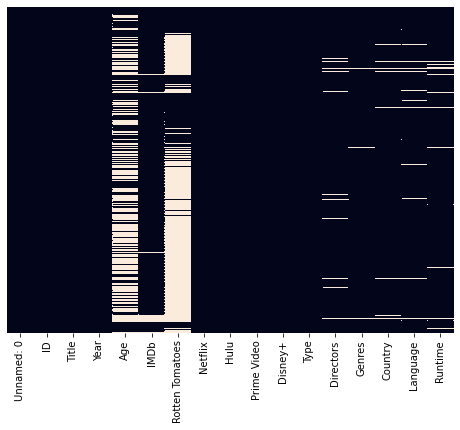

In [ ]:
data_inv(df)

Menghapus data Rotten Tomatoes

In [ ]:
df.drop(['Rotten Tomatoes', 'Age'], axis = 1, inplace=True)

No of Rows:  16744
No of Coloums:  15
**************************************************
Colums Names: 
 Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'IMDb', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')
**************************************************
Datatype of Columns: 
 Unnamed: 0       int64
ID               int64
Title           object
Year             int64
IMDb           float64
Netflix          int64
Hulu             int64
Prime Video      int64
Disney+          int64
Type             int64
Directors       object
Genres          object
Country         object
Language        object
Runtime        float64
dtype: object
**************************************************
Missing Values: 
IMDb         571
Directors    726
Genres       275
Country      435
Language     599
Runtime      592
dtype: int64
**************************************************
Missing vaules %age wise:

Un

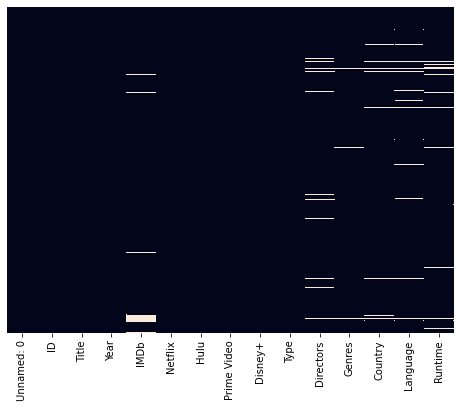

In [ ]:
data_inv(df)

In [ ]:
df.dropna(subset=['IMDb'], inplace=True)

No of Rows:  16173
No of Coloums:  15
**************************************************
Colums Names: 
 Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'IMDb', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')
**************************************************
Datatype of Columns: 
 Unnamed: 0       int64
ID               int64
Title           object
Year             int64
IMDb           float64
Netflix          int64
Hulu             int64
Prime Video      int64
Disney+          int64
Type             int64
Directors       object
Genres          object
Country         object
Language        object
Runtime        float64
dtype: object
**************************************************
Missing Values: 
Directors    483
Genres       101
Country      218
Language     372
Runtime      354
dtype: int64
**************************************************
Missing vaules %age wise:

Unnamed: 0     0.00

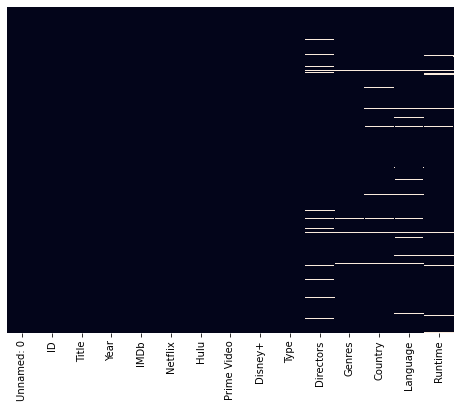

In [ ]:
data_inv(df)

No of Rows:  15233
No of Coloums:  15
**************************************************
Colums Names: 
 Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'IMDb', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')
**************************************************
Datatype of Columns: 
 Unnamed: 0       int64
ID               int64
Title           object
Year             int64
IMDb           float64
Netflix          int64
Hulu             int64
Prime Video      int64
Disney+          int64
Type             int64
Directors       object
Genres          object
Country         object
Language        object
Runtime        float64
dtype: object
**************************************************
Missing Values: 
Series([], dtype: int64)
**************************************************
Missing vaules %age wise:

Unnamed: 0     0.0
ID             0.0
Title          0.0
Year           0.0
IMDb           0

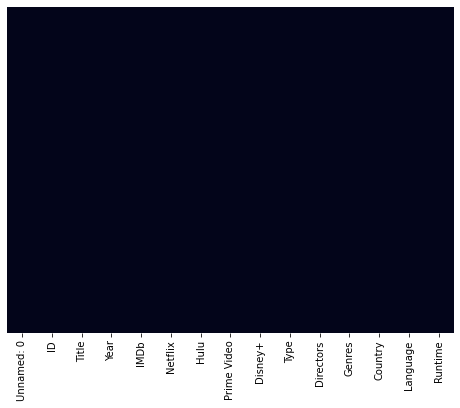

In [ ]:
df.dropna(subset=['Directors', 'Genres', 'Country', 'Language', 'Runtime'],inplace=True)
data_inv(df)

Data yang dihasilkan 0

**EVALUASI DATA**

In [ ]:
df.head()

,Unnamed: 0,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
df.shape

(15233, 15)

Melakukan cek data yang memiliki duplikat

In [ ]:
#checking for any duplicate data
df.drop_duplicates(inplace=True)

Melakukan pengecekan kolom yang unik atau berbeda

In [ ]:
#lets check out the unique values in first Column
df['Title'].value_counts()

The Invincible Armour                       1
Finding Nemo                                1
You Changed My Life                         1
Old Enough                                  1
The Return of Rin Tin Tin                   1
                                           ..
Fear and Desire                             1
Anthropoid                                  1
Love Laughs at Andy Hardy                   1
Katt Williams: The Pimp Chronicles Pt. 1    1
When Love Happens                           1
Name: Title, Length: 15233, dtype: int64

Tittlesnya bagus & unik

In [ ]:
print('Minimum IMDb rating: ', df['IMDb'].min())
print('Maximum IMDb rating: ', df['IMDb'].max())

Minimum IMDb rating:  0.0
Maximum IMDb rating:  9.3


Melakukan pengecekan tahun

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


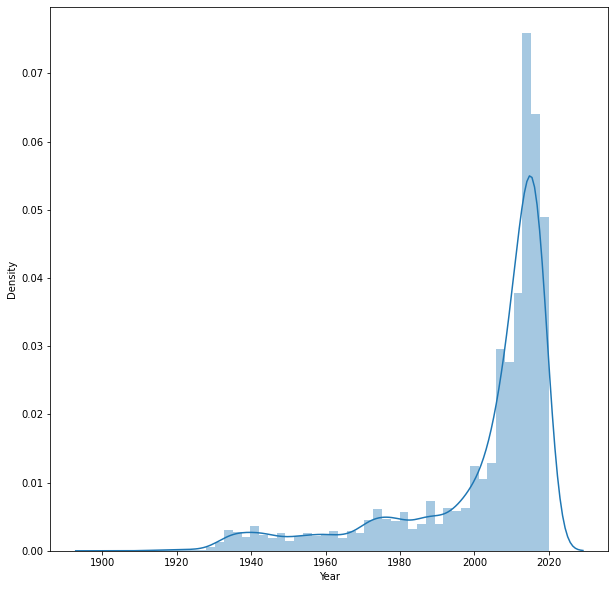

In [ ]:
#checking years
plt.figure(figsize=(10,10))
sns.distplot(df['Year'])
plt.show()

Memasukkan method fungsi

In [ ]:
def movies_count (platform, count=False):
    if count==False:
        print('Movies in {} are {}'. format(platform, df[platform].sum()))
    else:
        return df[platform].sum()

In [ ]:
df['IMDb']

0        8.8
1        8.7
2        8.5
3        8.5
4        8.8
        ... 
16734    5.9
16737    6.2
16738    5.0
16739    6.2
16740    4.7
Name: IMDb, Length: 15233, dtype: float64

Menampilkan Histogram Movies

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


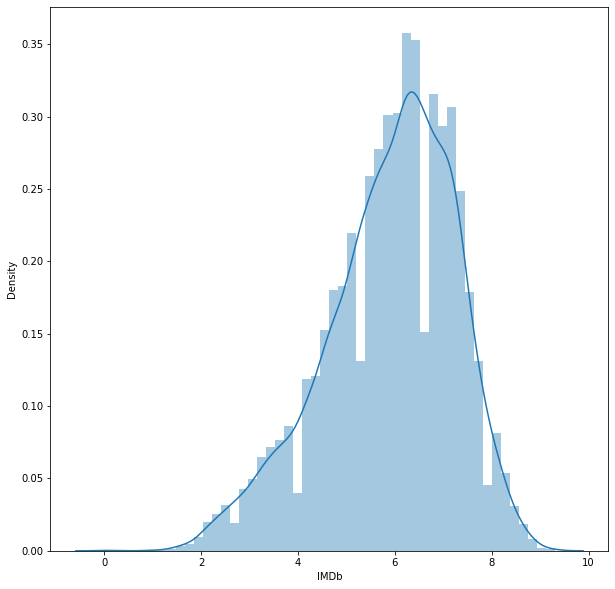

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['IMDb'])
#plt.hist(movies['IMDb'])
plt.show()

Menampilkan rating terendah dan tertinggi dari IMDb

In [ ]:
print('Minimum IMDb rating: ', df['IMDb'].min())
print('Maximum IMDb rating: ', df['IMDb'].max())

Minimum IMDb rating:  0.0
Maximum IMDb rating:  9.3


Menghitung Jumlah film di masing masing platform

In [ ]:
movies_count('Netflix')
movies_count('Hulu')
movies_count('Prime Video')
movies_count('Disney+')

Movies in Netflix are 3152
Movies in Hulu are 848
Movies in Prime Video are 11289
Movies in Disney+ are 542


Gambaran grafik dari masing-masing platform film

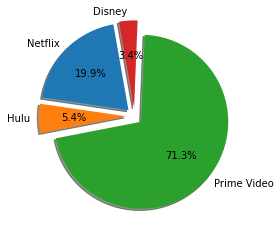

In [ ]:
#Movies per platform
labels = 'Netflix', 'Hulu', 'Prime Video', 'Disney'
size = [movies_count('Netflix', count=True), 
        movies_count('Hulu', count=True),
        movies_count('Prime Video', count=True),
        movies_count('Disney+', count=True)]

explode = (0.1, 0.1, 0.1, 0.1)

#plotting
fig1, ax1 = plt.subplots()

ax1.pie(size,
       labels = labels,
       autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle = 100)

ax1.axis = ('equal')
plt.show()


Jadi, Prime Vides menampung jumlah maksimum judul, tetapi perlu dicatat bahwa pada jumlah tambahan (3152+ 848 + 11289 + 542), maka didapatkan 15831, yang berarti ada 598 film yang hadir di lebih dari satu platform

Kolom Type memiliki nilai 0

In [ ]:
df['Type'].value_counts()

0    15233
Name: Type, dtype: int64

Menghapus kolom type

In [ ]:
df.drop('Type', inplace=True, axis =1)
df.shape

(15233, 14)

Menghitung kolom direktor

In [ ]:
df['Directors'].value_counts()

Jay Chapman                       35
Joseph Kane                       30
Cheh Chang                        26
Jim Wynorski                      22
Sam Newfield                      22
                                  ..
Gabriele Muccino                   1
Keefe Brasselle,I. Robert Levy     1
Darin Beckstead                    1
Brad Watson                        1
Bryan Law                          1
Name: Directors, Length: 10788, dtype: int64

Memberikan method

In [ ]:
s = df['Directors'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Directors'
del df['Directors']
df_directors = df.join(s)

Menampilkan Grafik tertinggi dilihat dari direktur masing-masing platform film

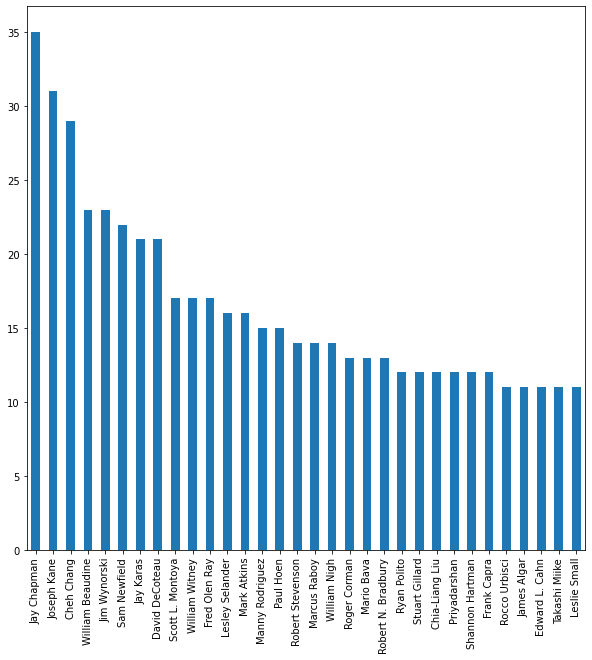

In [ ]:
data = df_directors['Directors'].value_counts()
threshold = 10
prob = data > threshold
data_new = data.loc[prob]

plt.figure(figsize=(10,10))
data_new.plot(kind='bar')
plt.show()

Memasukkan method

In [ ]:
s = df['Genres'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genres'
del df['Genres']
df_genres = df.join(s)

Menampilkan data berdasarkan genres

In [ ]:
df_genres.head()

,Unnamed: 0,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Country,Language,Runtime,Genres
0,0,1,Inception,2010,8.8,1,0,0,0,"United States,United Kingdom","English,Japanese,French",148.0,Action
0,0,1,Inception,2010,8.8,1,0,0,0,"United States,United Kingdom","English,Japanese,French",148.0,Adventure
0,0,1,Inception,2010,8.8,1,0,0,0,"United States,United Kingdom","English,Japanese,French",148.0,Sci-Fi
0,0,1,Inception,2010,8.8,1,0,0,0,"United States,United Kingdom","English,Japanese,French",148.0,Thriller
1,1,2,The Matrix,1999,8.7,1,0,0,0,United States,English,136.0,Action


Menampilkan Jumlah dari genres terbanyak dari data-data lainnya

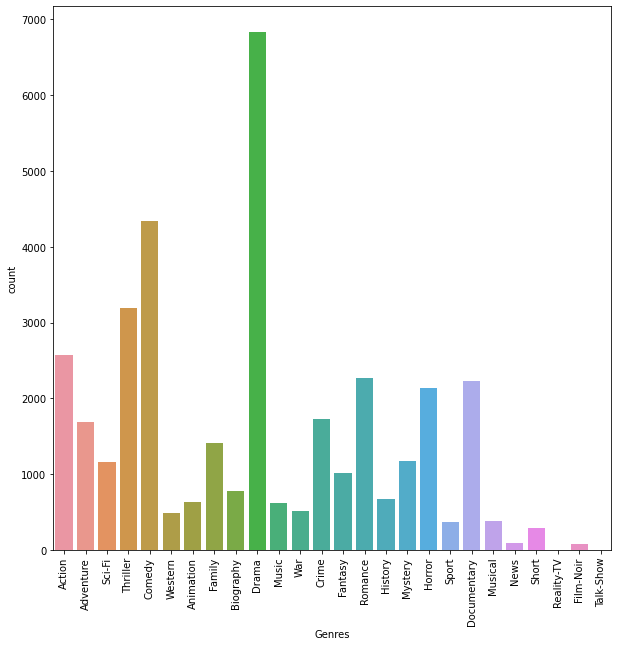

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Genres', data=df_genres)
plt.xticks(rotation=90)
plt.show()

Memasukkan method

In [ ]:
s = df['Country'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Country'
del df['Country']
df_country = df.join(s)

Menampilkan data Country terbanyak

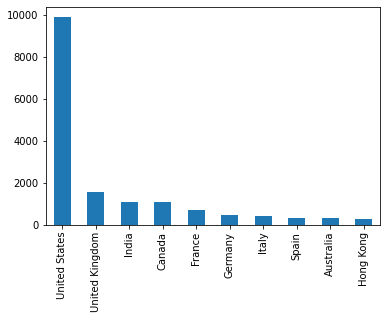

In [ ]:
df_country['Country'].value_counts()[:10].plot(kind='bar')
plt.show()

Memasukkan method

In [ ]:
s = df['Language'].str.split(',').apply(Series,1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Language'
del df['Language']
df_language = df.join(s)

Menampilkan jumlah language terbanyak dari data-data lainnya

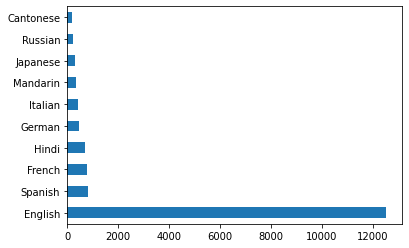

In [ ]:
df_language['Language'].value_counts()[:10].plot(kind='barh')
plt.show()

Menampilkan jumlah penayangan tertinggi

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


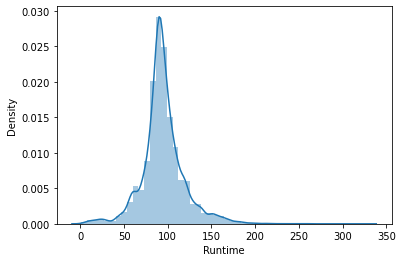

In [ ]:
sns.distplot(df['Runtime'])
plt.show()

Menampilkan judul film dengan jumlah runtime terbanyak

In [ ]:
filter =( df['Runtime'] == (df['Runtime'].max()))
df[filter]

,Unnamed: 0,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
13048,13048,13049,Custer's Last Stand,1936,4.6,0,0,1,0,328.0


Menampilkan judul film dengan runtime paling sedikit

In [ ]:
filter =( df['Runtime'] == (df['Runtime'].min()))
df[filter]

,Unnamed: 0,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
2626,2626,2627,Liefling The Movie,2010,6.3,1,0,0,0,1.0


Menampilkan film urutan film terbaik

In [ ]:
#top rated movie
filter =( df['IMDb'] == (df['IMDb'].max()))
df[filter]

,Unnamed: 0,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
6566,6566,6567,Square One,2019,9.3,0,0,1,0,83.0
6837,6837,6838,Steven Banks: Home Entertainment Center,1989,9.3,0,0,1,0,60.0
7220,7220,7221,"Down, But Not Out!",2015,9.3,0,0,1,0,68.0
7426,7426,7427,Bounty,2011,9.3,0,0,1,0,132.0


Menampilkan urutan film dari yang terendah

In [ ]:
# Bottom Rated movie
filter =( df['IMDb'] == (df['IMDb'].min()))
df[filter]

,Unnamed: 0,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
13813,13813,13814,In Memoriam Alexander Litvinenko,2007,0.0,0,0,1,0,55.0
13821,13821,13822,From Philadelphia To Fallujah,2011,0.0,0,0,1,0,42.0


**KESIMPULAN**

Menjelaskan tentang dafta platform film yang ada di dunia untuk dibandingan dan dilihat mana platform film terbaik dan mana platform film yang paling rendah digunakan. tujuannya untuk bisa mengetahui data-data dari jumlah platform film yang sering digunakan oleh manusia.